## **PACKAGE**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gc

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

## **DATA**

In [3]:
# Lokasi dataset di kernel Kaggle
train_path = '/kaggle/input/penyisihan-data-vers-anava-19/train.csv'
test_path = '/kaggle/input/penyisihan-data-vers-anava-19/test.csv'
mac_area_path = '/kaggle/input/penyisihan-data-vers-anava-19/Machine-Area.csv'
mac_list_path = '/kaggle/input/penyisihan-data-vers-anava-19/Machine-List.csv'
area_list_path = '/kaggle/input/penyisihan-data-vers-anava-19/Area-List.csv'

In [4]:
# Membaca dataset
mac_area = pd.read_csv(mac_area_path)
mac_list = pd.read_csv(mac_list_path)
area_list = pd.read_csv(area_list_path)

In [5]:
train = pd.read_csv(train_path)

In [6]:
# test = pd.read_csv(test_path)

In [7]:
# Mengganti nama kolom 'Machine' menjadi 'ID_Mesin'
train.rename(columns={'Machine': 'ID_Mesin'}, inplace=True)

In [8]:
# test.rename(columns={'Machine': 'ID_Mesin'}, inplace=True)

#### Data Information

In [9]:
train.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,ID_Mesin,...,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status,Breakdown Category
0,TRXc8f4c2dcbfe501093501015b32bd0ba2,1110.970519,NaN,106.145582,38.779147,262.330188,33.916720,NaN,ID12,A.4,...,2666.124927,2956.904780,4779.579998,3681.056129,19.624641,40.938353,NaN,Yes,Warning,NaN
1,TRXe9e6c37fc1281efd6c5ba52fce259584,608.487665,19.932166,375.386134,17.736401,45.051041,4.542451,-21.991755,ID37,K.3,...,2907.253211,2773.384487,4282.046671,4527.123292,28.167360,NaN,311.803841,Yes,Normal,NaN
2,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,ID24,J.1,...,3215.057495,3072.879720,4180.407796,4841.741619,29.843080,46.980726,1257.681079,No,Normal,NaN
3,TRX06f9e5574a639bcedb7ec8c3cb9fbaa4,710.093309,26.190643,294.871314,30.639358,140.984886,18.843502,-39.872275,ID7,J.4,...,4361.849341,3295.409873,3337.288244,3877.348905,28.720636,54.860603,478.325694,No,Breakdown,Unplanned Downtime
4,TRXd8f3a5ce90d25127ba3240a12eb9c140,410.114364,9.664961,185.267516,28.154454,57.002150,23.915704,NaN,ID41,J.2,...,4817.893609,3084.624619,NaN,2501.387065,26.907301,NaN,674.159077,Yes,Breakdown,Unplanned Downtime


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000000 entries, 0 to 12999999
Data columns (total 28 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID_Transaction            object 
 1   temperature_10H_max (°C)  float64
 2   temperature_10H_min (°C)  float64
 3   temperature-1             float64
 4   temperature-2             float64
 5   temperature-3             float64
 6   apparent_temperature_max  float64
 7   apparent_temperature_min  float64
 8   ID_Area                   object 
 9   ID_Mesin                  object 
 10  timestamp                 object 
 11  humidity                  float64
 12  Voltage-L                 float64
 13  Voltage-R                 float64
 14  Voltage-M                 float64
 15  Current-M                 float64
 16  Current-R                 float64
 17  Current-T                 float64
 18  RPM                       float64
 19  RPM-1                     float64
 20  RPM-2                 

In [11]:
# test.head()

In [12]:
# test.info()

#### NA

In [13]:
def analyze_missing_values(df):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_pct
    }).sort_values('Percentage', ascending=False)
    
    print("\n=== Missing Values Analysis ===")
    print(missing_df[missing_df['Missing Values'] > 0])

In [14]:
analyze_missing_values(train)


=== Missing Values Analysis ===
                          Missing Values  Percentage
Breakdown Category               9594402   73.803092
Current-T                        2954720   22.728615
apparent_temperature_max         2775038   21.346446
apparent_temperature_min         2621692   20.166862
humidity                         2532064   19.477415
temperature_10H_min (°C)         2488572   19.142862
RPM-2                            2438948   18.761138
RPM-3                            2360433   18.157177
ID_Area                          2245196   17.270738
ID_Mesin                         2184031   16.800238
Vibration-2                      1973544   15.181108
RPM-1                            1745236   13.424892
Power                            1702431   13.095623
temperature-2                    1508600   11.604615
RPM                              1440706   11.082354
Voltage-L                        1255754    9.659646
Voltage-R                         897445    6.903423
Vibration-1  

- Variabel (Breakdown Category) harus dihapus karena memiliki nilai NA>70% dan tidak ada di data test.

In [15]:
train = train.drop(columns = 'Breakdown Category')

#### Target Distribution

In [16]:
def analyze_target(df):
    print("\n=== Target Variable Analysis ===")
    status_counts = df['Status'].value_counts()
    print("\nStatus Distribution:")
    print(status_counts)
    print("\nStatus Distribution (%):")
    print((status_counts/len(df)*100).round(2))
    
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='Status')
    plt.title('Distribution of Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


=== Target Variable Analysis ===

Status Distribution:
Status
Normal       7986989
Warning      2550024
Breakdown    2462987
Name: count, dtype: int64

Status Distribution (%):
Status
Normal       61.44
Warning      19.62
Breakdown    18.95
Name: count, dtype: float64


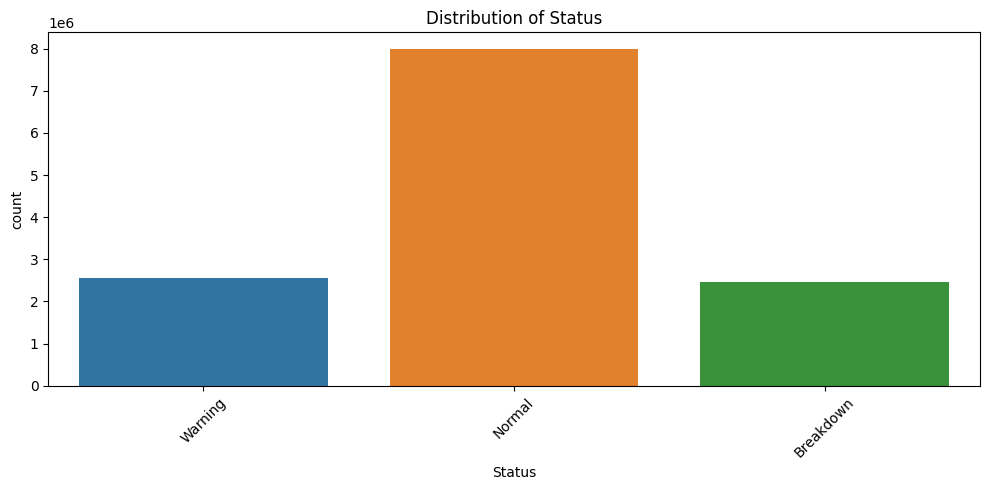

In [17]:
analyze_target(train)

Terlihat sebaran data tidak merata, dnegan dominasi status 'Normal'

#### Categorical Variable

In [18]:
def analyze_categorical(df):
    print("\n=== Categorical Features Analysis ===")
    categorical_cols = ['ID_Area', 'ID_Mesin', 'Power_Backup']
    
    for col in categorical_cols:
        print(f"\n{col} Value Counts:")
        print(df[col].value_counts().head())
        print(f"\nUnique values in {col}:", df[col].nunique())

In [19]:
analyze_categorical(train)


=== Categorical Features Analysis ===

ID_Area Value Counts:
ID_Area
ID34    331605
ID24    331335
ID36    305266
ID19    305259
ID21    304644
Name: count, dtype: int64

Unique values in ID_Area: 42

ID_Mesin Value Counts:
ID_Mesin
D.4    297825
E.3    297396
I.1    288991
G.1    287921
J.3    279179
Name: count, dtype: int64

Unique values in ID_Mesin: 44

Power_Backup Value Counts:
Power_Backup
Yes    6281604
No     6280999
Name: count, dtype: int64

Unique values in Power_Backup: 2


In [20]:
gc.collect()

3169

## **JOIN DATA**

In [21]:
area_list.head()

,ID_Area,Area,Priority
0,ID1,BLJA,Low
1,ID2,SDA,Low
2,ID3,BGR,Low
3,ID4,SKBM,Medium
4,ID5,SMGS,High


In [22]:
mac_area.head()

,ID_Mesin,Mesin,Country Machine,ID_Area,Last Maintenance,Status Sparepart,Age
0,B.4,Novamax,US,ID21,2020-01-18,Broken,2
1,H.2,Risco-TR300,CN,ID29,2021-12-08,Repair,6
2,I.3,Vacuum Filler-2,US,ID21,2020-01-17,Repair,18
3,A.3,Risco-TR700,CN,ID7,2020-08-26,On Check,4
4,G.2,Risco-TR200,TW,ID6,2020-05-11,On Check,18


In [23]:
mac_list.head()

,ID_Mesin,Mesin,Country Machine
0,A.1,NL1,JP
1,B.1,NL2,US
2,C.1,NL3,US
3,D.1,Hitech-1,KR
4,E.1,Plate Fomer Stork,JP


Selanjutnya akan dilakukan join data
- Country Machine ke data mac_area (opsional)
- Priority dan Area dari area_list
- Age, Last Maintenance, Status Sparepart, Country Machine

Priority dan Area dari area_list ke train

In [24]:
def add_priority(train_df, area_list_df):
    
    # Create a mapping dictionary from area_list
    priority_mapping = dict(zip(area_list_df['ID_Area'], area_list_df['Priority']))
    
    # Add priority column to train_df using map
    train_df['Priority'] = train_df['ID_Area'].map(priority_mapping)
    
    return train_df

In [25]:
def add_area(train_df, area_list_df):
    
    # Create a mapping dictionary from area_list
    area_mapping = dict(zip(area_list_df['ID_Area'], area_list_df['Area']))
    
    # Add priority column to train_df using map
    train_df['Area'] = train_df['ID_Area'].map(area_mapping)
    
    return train_df

In [26]:
train_df_with_priority = add_priority(train, area_list)

In [27]:
train_df_with_area = add_area(train_df_with_priority, area_list)

In [28]:
# test_df_with_priority = add_priority(test, area_list)

In [29]:
# test_df_with_area = add_area(test_df_with_priority, area_list)

Age, Last Maintenance, Status Sparepart, Country Machine

In [30]:
def add_maintenance(train_df, mac_area_df):
    # Melakukan penggabungan (merge) berdasarkan ID_Area dan ID_Mesin
    merged_df = train_df.merge(mac_area_df[['ID_Area', 'ID_Mesin', 'Last Maintenance']], 
                                on=['ID_Area', 'ID_Mesin'], 
                                how='left')
    
    train_df['Last Maintenance'] = merged_df['Last Maintenance']
    
    return train_df

In [31]:
train_df_with_maintenance = add_maintenance(train_df_with_area, mac_area)

In [32]:
# test_df_with_maintenance = add_maintenance(test_df_with_area, mac_area)

In [33]:
def add_sparepart(train_df, mac_area_df):
    # Melakukan penggabungan (merge) berdasarkan ID_Area dan ID_Mesin
    merged_df = train_df.merge(mac_area_df[['ID_Area', 'ID_Mesin', 'Status Sparepart']], 
                                on=['ID_Area', 'ID_Mesin'], 
                                how='left')
    
    train_df['Status Sparepart'] = merged_df['Status Sparepart']
    
    return train_df

In [34]:
train_df_with_sparepart = add_sparepart(train_df_with_maintenance, mac_area)

In [35]:
# test_df_with_sparepart = add_sparepart(test_df_with_maintenance, mac_area)

In [36]:
def add_age(train_df, mac_area_df):
    # Melakukan penggabungan (merge) berdasarkan ID_Area dan ID_Mesin
    merged_df = train_df.merge(mac_area_df[['ID_Area', 'ID_Mesin', 'Age']], 
                                on=['ID_Area', 'ID_Mesin'], 
                                how='left')
    
    train_df['Age'] = merged_df['Age']
    
    return train_df

In [37]:
train_df_with_age = add_age(train_df_with_sparepart, mac_area)

In [38]:
# test_df_with_age = add_age(test_df_with_sparepart, mac_area)

In [39]:
def add_country(train_df, mac_area_df):
    # Melakukan penggabungan (merge) berdasarkan ID_Area dan ID_Mesin
    merged_df = train_df.merge(mac_area_df[['ID_Area', 'ID_Mesin', 'Country Machine']], 
                                on=['ID_Area', 'ID_Mesin'], 
                                how='left')
    
    train_df['Country Machine'] = merged_df['Country Machine']
    
    return train_df

In [40]:
train_full = add_country(train_df_with_age, mac_area)

In [41]:
# test_full = add_country(test_df_with_age, mac_area)

In [42]:
train_full.head()

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,ID_Mesin,...,Vibration-2,Power,Power_Backup,Status,Priority,Area,Last Maintenance,Status Sparepart,Age,Country Machine
0,TRXc8f4c2dcbfe501093501015b32bd0ba2,1110.970519,NaN,106.145582,38.779147,262.330188,33.916720,NaN,ID12,A.4,...,40.938353,NaN,Yes,Warning,Medium,SRBY,2021-05-05,Broken,8.0,JP
1,TRXe9e6c37fc1281efd6c5ba52fce259584,608.487665,19.932166,375.386134,17.736401,45.051041,4.542451,-21.991755,ID37,K.3,...,NaN,311.803841,Yes,Normal,Medium,BKS,2020-10-09,Ready,11.0,JP
2,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,ID24,J.1,...,46.980726,1257.681079,No,Normal,High,SKBM,2020-02-12,On Check,1.0,KR
3,TRX06f9e5574a639bcedb7ec8c3cb9fbaa4,710.093309,26.190643,294.871314,30.639358,140.984886,18.843502,-39.872275,ID7,J.4,...,54.860603,478.325694,No,Breakdown,Medium,KRWG,2021-01-24,Broken,12.0,JP
4,TRXd8f3a5ce90d25127ba3240a12eb9c140,410.114364,9.664961,185.267516,28.154454,57.002150,23.915704,NaN,ID41,J.2,...,NaN,674.159077,Yes,Breakdown,Medium,BPN,2021-10-22,In Use,2.0,US


In [43]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000000 entries, 0 to 12999999
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID_Transaction            object 
 1   temperature_10H_max (°C)  float64
 2   temperature_10H_min (°C)  float64
 3   temperature-1             float64
 4   temperature-2             float64
 5   temperature-3             float64
 6   apparent_temperature_max  float64
 7   apparent_temperature_min  float64
 8   ID_Area                   object 
 9   ID_Mesin                  object 
 10  timestamp                 object 
 11  humidity                  float64
 12  Voltage-L                 float64
 13  Voltage-R                 float64
 14  Voltage-M                 float64
 15  Current-M                 float64
 16  Current-R                 float64
 17  Current-T                 float64
 18  RPM                       float64
 19  RPM-1                     float64
 20  RPM-2                 

Join data berhasil, karena jumlah baris pada train dan test sama seperti sebelumnya.
Selanjutnya dilakukan EDA data hasil join agar bisa ditemukan praproses yang sesuai.

In [44]:
train_full.to_csv('/kaggle/working/train_full.csv', index=False)

In [45]:
# test_full.to_csv('/kaggle/working/test_full.csv', index=False)

#### NA

Cek NA setelah join data

In [46]:
def analyze_missing_values(df):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_pct
    }).sort_values('Percentage', ascending=False)
    
    print("\n=== Missing Values Analysis ===")
    print(missing_df[missing_df['Missing Values'] > 0])

In [47]:
analyze_missing_values(train_full)


=== Missing Values Analysis ===
                          Missing Values  Percentage
Country Machine                  4031795   31.013808
Last Maintenance                 4031795   31.013808
Status Sparepart                 4031795   31.013808
Age                              4031795   31.013808
Current-T                        2954720   22.728615
apparent_temperature_max         2775038   21.346446
apparent_temperature_min         2621692   20.166862
humidity                         2532064   19.477415
temperature_10H_min (°C)         2488572   19.142862
RPM-2                            2438948   18.761138
RPM-3                            2360433   18.157177
Area                             2245196   17.270738
Priority                         2245196   17.270738
ID_Area                          2245196   17.270738
ID_Mesin                         2184031   16.800238
Vibration-2                      1973544   15.181108
RPM-1                            1745236   13.424892
Power        

In [48]:
# analyze_missing_values(test_full)